In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Download Apple stock data for the last 10 years
data = yf.download("AAPL", period="10y", auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-02-12,28.242012,28.469807,28.043251,28.152681,297898000
2015-02-13,28.380482,28.425147,28.061123,28.425147,217088800
2015-02-17,28.547981,28.782476,28.344752,28.472049,252609600
2015-02-18,28.746737,28.760136,28.463109,28.503308,179566800
2015-02-19,28.686440,28.815970,28.659641,28.693139,149449600


In [ ]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-06,232.963867,233.543232,230.176923,231.035979,29925300
2025-02-07,227.380005,233.743004,227.010401,232.344548,39707200
2025-02-10,227.649994,230.589996,227.199997,229.570007,33115600
2025-02-11,232.619995,235.229996,228.130005,228.199997,53677600
2025-02-12,234.869995,234.960007,230.679993,231.274994,16542278


In [ ]:
# Reset index to ensure 'Date' is a column
data.reset_index(inplace=True)

In [ ]:
data.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [ ]:
#Flatten MultiIndex columns
data.columns = ['Date' if col[0] == 'Date' else '_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]

In [ ]:
data.columns

Index(['Date', 'Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL',
       'Volume_AAPL'],
      dtype='object')

In [ ]:
#Set 'Date' as index
data.set_index('Date', inplace=True)

In [ ]:
data.index

DatetimeIndex(['2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18',
               '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24',
               '2015-02-25', '2015-02-26',
               ...
               '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04',
               '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10',
               '2025-02-11', '2025-02-12'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

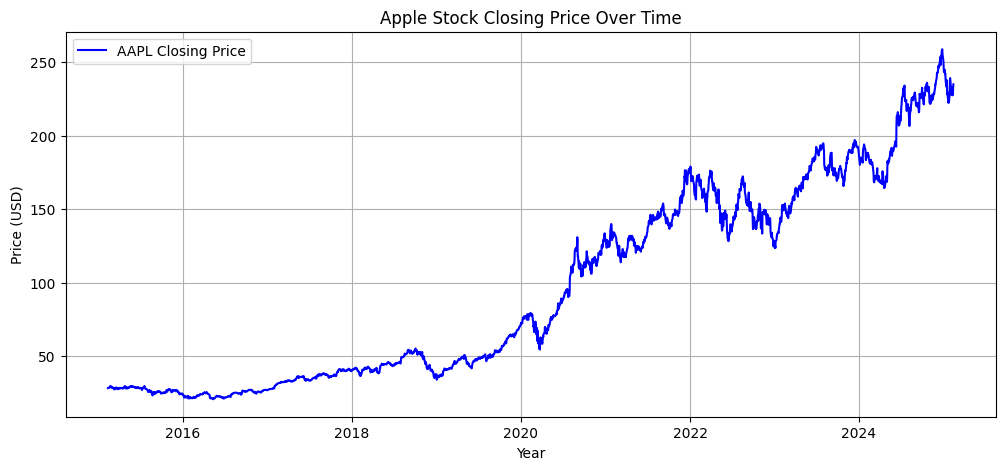

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data['Close_AAPL'], label='AAPL Closing Price', color='blue')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=data.index,  # Date column
    open=data['Open_AAPL'],  # Open price
    high=data['High_AAPL'],  # High price
    low=data['Low_AAPL'],    # Low price
    close=data['Close_AAPL'] # Close price
)])

fig.update_layout(
    title='Apple Stock Candlestick Chart',
    xaxis_title='Year',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False,  # Set to True if you want a range slider below
    template='plotly_dark'
)
fig.show()

In [ ]:
col_names = list(data.columns)
print(col_names)

['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL']


In [ ]:
def plot_chart(data, col_names):
    """
    Function to plot line charts for all numeric columns in the dataset.

    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot.
        col_names (list): List of column names to plot.
    """
    for col in col_names:
            plt.figure(figsize=(12, 6))
            plt.plot(data.index, data[col], label=f'{col} Price', linewidth=1)
            plt.title(f'{col} Prices Over Time')
            plt.xlabel('Year')
            plt.ylabel(col)
            plt.legend()
            plt.grid()
            plt.show()

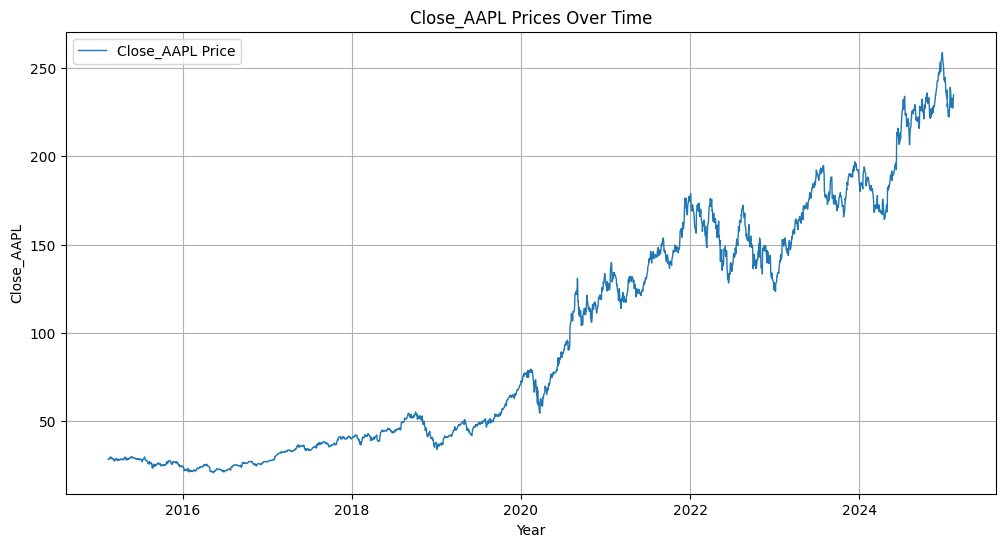

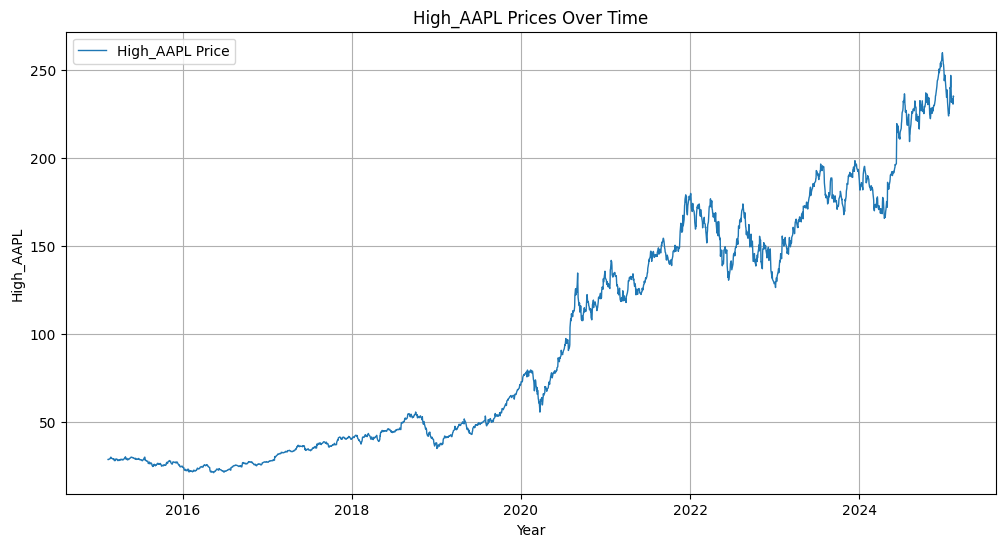

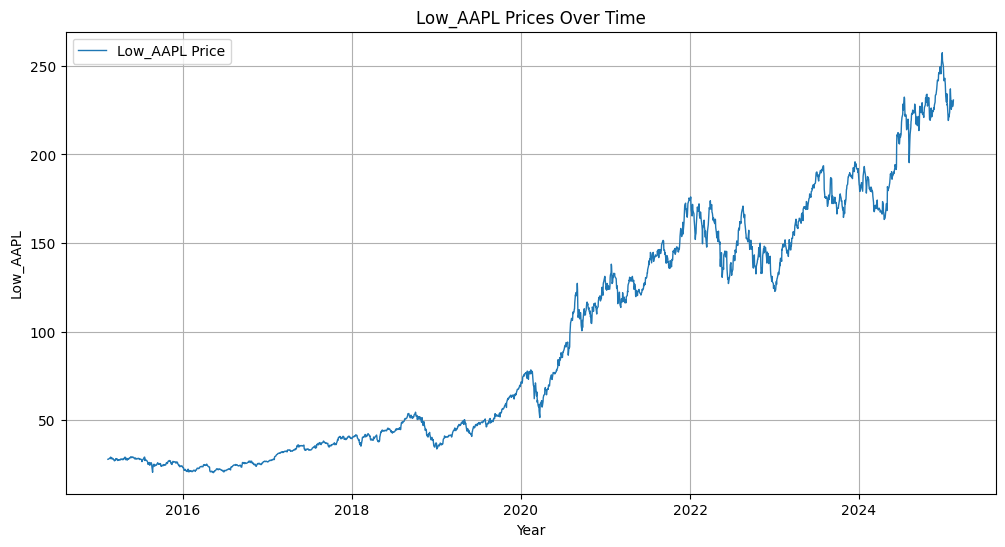

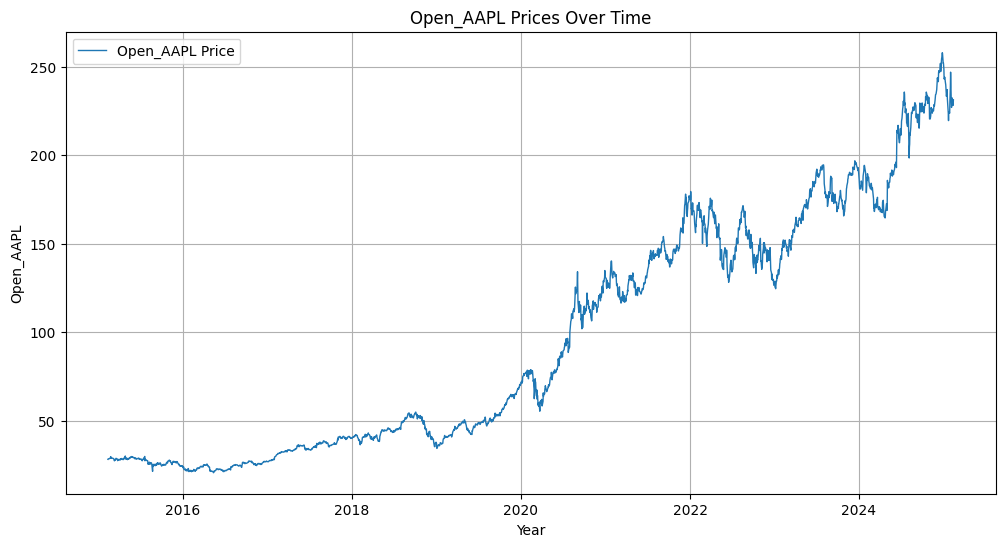

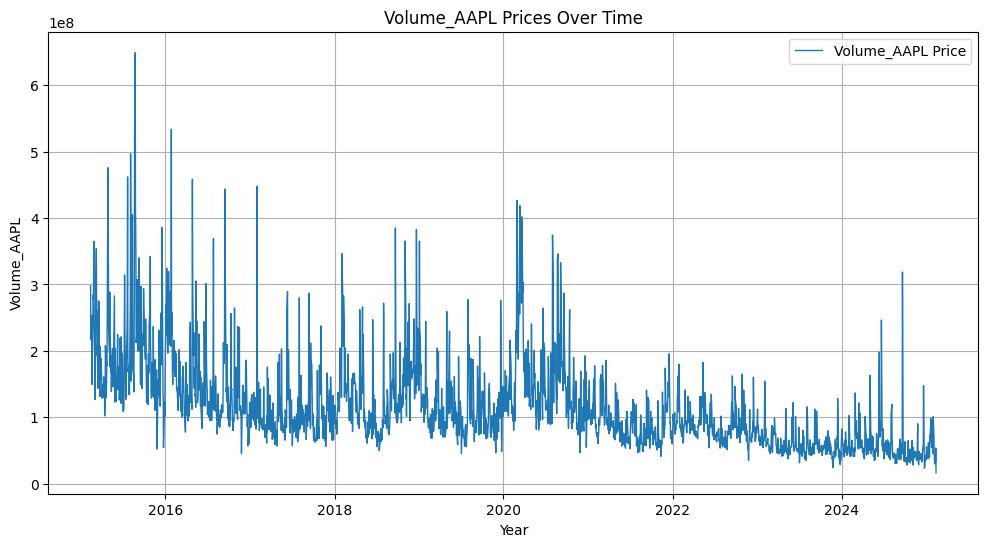

In [ ]:
# Call the function to plot charts for all columns
plot_chart(data, col_names)

**Moving average of the various stocks.**

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.


**Advantages of Moving Averages:**

Technical Analysis:Moving Averages help traders and investors understand the market's direction and make informed decisions based on price patterns.


Trend Confirmation: They confirm trends when prices consistently stay above or below certain moving averages.


Market Sentiment: Moving averages reflect overall market sentiment. A rising MA indicates bullish sentiment, while a falling MA indicates bearish sentiment.

In [ ]:
import plotly.graph_objects as go

# Calculate the 20-day and 50-day moving averages
data['20 Day MA'] = data['Close_AAPL'].rolling(window=20).mean()
data['50 Day MA'] = data['Close_AAPL'].rolling(window=50).mean()

# Create a Plotly figure
fig = go.Figure()

# Add the closing price line
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['Close_AAPL'],
    mode='lines',
    name='Apple Closing Price',
    line=dict(color='blue', width=1)
))

# Add the 20-day moving average line
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['20 Day MA'],
    mode='lines',
    name='20 Day Moving Average',
    line=dict(color='red', width=1)
))

# Add the 50-day moving average line
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['50 Day MA'],
    mode='lines',
    name='50 Day Moving Average',
    line=dict(color='green', width=1)
))

# Customize layout
fig.update_layout(
    title='Apple Stock Closing Prices and Moving Averages Over Time',
    xaxis_title='Year',
    yaxis_title='Closing Price (USD)',
    legend_title='Legend',
    template='plotly_dark',
    xaxis_rangeslider_visible=False
)
fig.show()

In [ ]:
data.isnull().sum()

,0
Close_AAPL,0
High_AAPL,0
Low_AAPL,0
Open_AAPL,0
Volume_AAPL,0
20 Day MA,19
50 Day MA,49


**Time Series Forecasting**

In [ ]:
ts_data=data.copy()

In [ ]:
print(list(ts_data.columns))

['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL', '20 Day MA', '50 Day MA']


In [ ]:
ts_data['Close_AAPL'].isnull().sum()

0

In [ ]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-02-12 to 2025-02-12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_AAPL   2516 non-null   float64
 1   High_AAPL    2516 non-null   float64
 2   Low_AAPL     2516 non-null   float64
 3   Open_AAPL    2516 non-null   float64
 4   Volume_AAPL  2516 non-null   int64  
 5   20 Day MA    2497 non-null   float64
 6   50 Day MA    2467 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [ ]:
print(type(ts_data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [ ]:
#!pip install statsmodels
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decompostion with an appropriate period for this dataset
# Assuming daily data with yearly seasonality (period = 252 for trading days , excluding weekends and holidays).
model = seasonal_decompose(ts_data["Close_AAPL"],model="multiplicative",period=252)

# plot the decompose components
Trend=model.trend
Seasonal=model.seasonal
Residual=model.resid

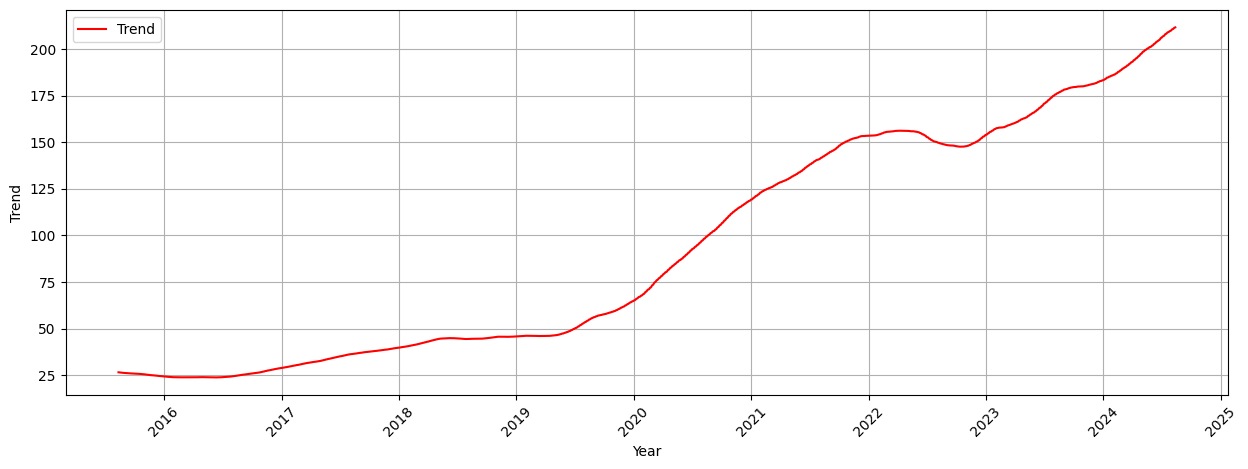

In [ ]:
# plot the Trend
plt.figure(figsize=(15, 5))
plt.plot(ts_data.index, Trend, label="Trend", color="red")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()

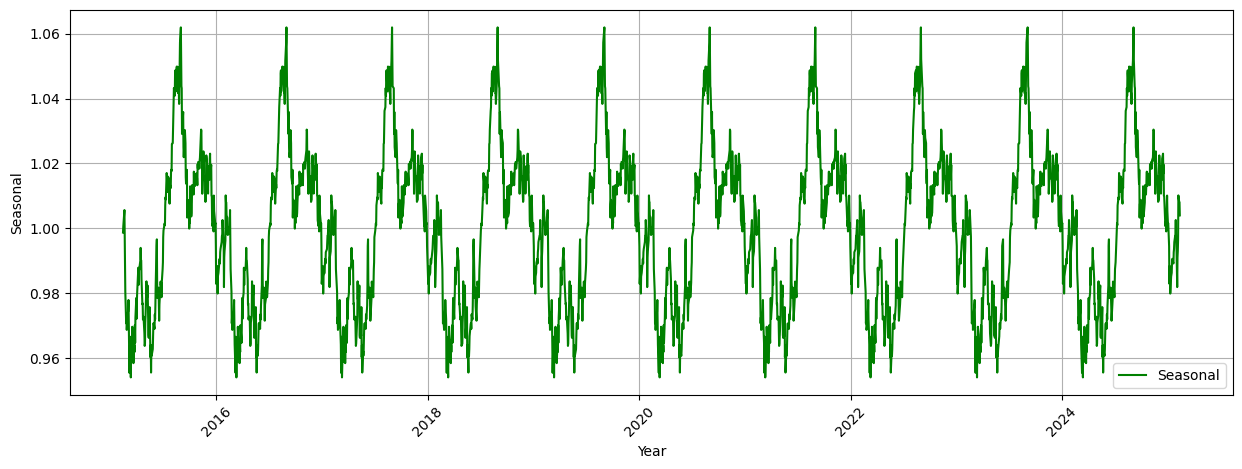

In [ ]:
# plot seasonal component
plt.figure(figsize=(15, 5))
plt.plot(ts_data.index, Seasonal, label="Seasonal", color="green")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Seasonal")
plt.xticks(rotation=45)
plt.grid()
plt.show()

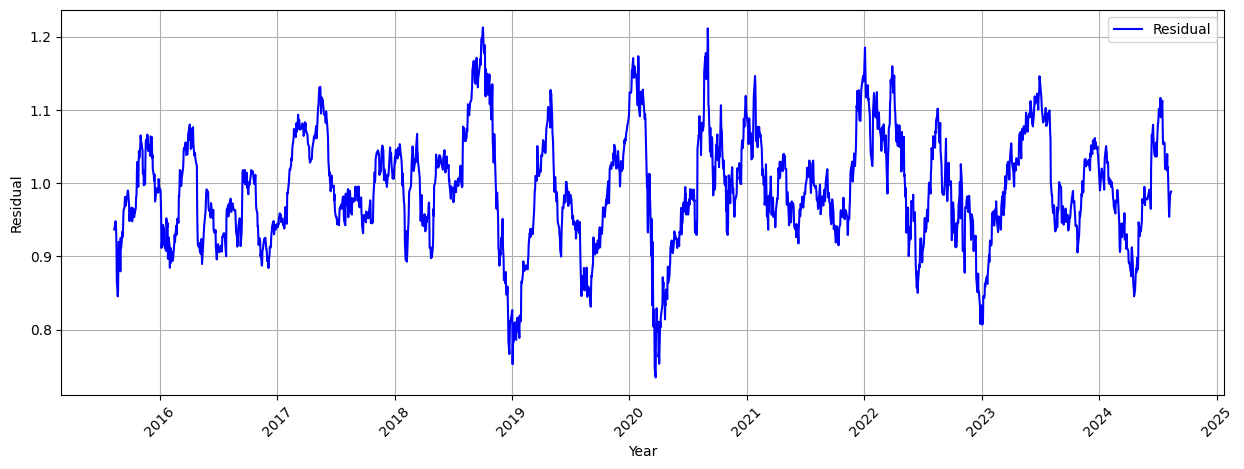

In [ ]:
# plot Residual component
plt.figure(figsize=(15, 5))
plt.plot(ts_data.index, Residual, label="Residual", color="blue")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Residual")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Test for Stationarity (ADFuller Test)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import warnings

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    #Output the results
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
      print('\t%s: %.3f' % (key, value))
    if result[1] <= 0.05:
        print("The series is stationary.")
    else:
        print("The series is NOT stationary.")

adf_test(ts_data['Close_AAPL'])

ADF Statistic: 0.425115
p-value: 0.982410
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is NOT stationary.


**Understanding the ADF Test Output:**

**ADF Statistic = 0.283476**

This value is greater than all critical values (-3.433, -2.863, -2.567), meaning that the time series is likely non-stationary.


**p-value = 0.976574**

A high p-value (> 0.05) suggests that we fail to reject the null hypothesis (H₀: The series has a unit root, meaning it is non-stationary). Since  0.976574 is much greater than 0.05, it confirms that the data is non-stationary.


**Critical Values:**

These are threshold values at different confidence levels (1%, 5%, 10%). Since the ADF statistic (0.283476) is higher than all of these, the test does not provide evidence to reject the null hypothesis.


Conclusion: Stock price data is non-stationary, which is expected since stock prices generally follow a trend and are not mean-reverting.


Next Steps: Since ARIMA and SARIMA models require a stationary time series, we should differentiate the data to remove trends and make it stationary.

In [ ]:
import numpy as np

# Applying log transformation
ts_data['Close_AAPL_log'] = np.log(ts_data['Close_AAPL'])

In [ ]:
ts_data['Close_AAPL_log'] = ts_data['Close_AAPL_log'].diff().dropna()

# Run ADF test again on the differenced data (ts_data['Close_AAPL_log'])
adf_test(ts_data['Close_AAPL_log'])

ADF Statistic: -15.616501
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The series is stationary.


**Interpreting the Results:**

**ADF Statistic = -15.586721**

This is much lower than all critical values (-3.433, -2.863, -2.567), indicating strong evidence against the null hypothesis (H₀: The series is non-stationary).



p-value = 0.000000

Since this is 0, we reject the null hypothesis and confirm that the data is now stationary.



Critical Values (1%, 5%, 10%)

The ADF statistic is much smaller than these thresholds, reinforcing that the time series is stationary.



Conclusion: Differenced series ('Close_AAPL_log') is now stationary, so we can proceed with fitting an ARIMA/SARIMA model using this transformed data.

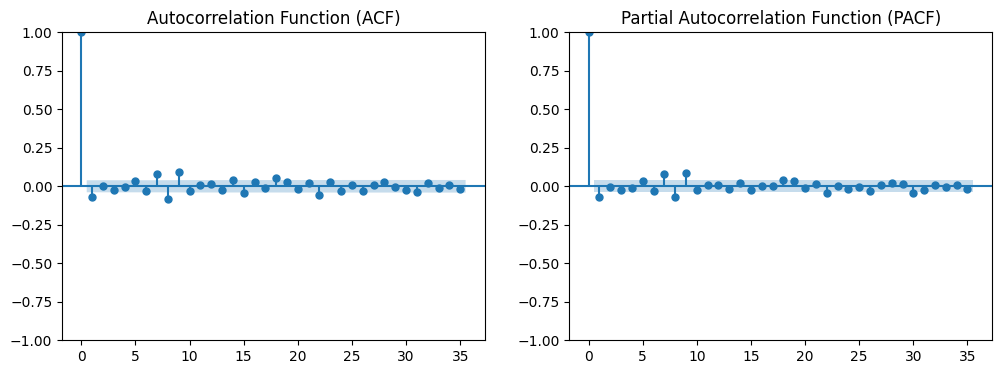

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(ts_data['Close_AAPL_log'].dropna(), ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(ts_data['Close_AAPL_log'].dropna(), ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.2 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

# Fit the model with automatic selection of parameters (p, d, q)
arima_model = auto_arima(ts_data['Close_AAPL'], seasonal=False, trace=True,
                   error_action='ignore', suppress_warnings=True)

# Print the summary of the best model
print(arima_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10586.981, Time=9.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10582.222, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10583.703, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10583.685, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10584.539, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10584.505, Time=4.61 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 15.633 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2516
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -5289.111
Date:                Wed, 12 Feb 2025   AIC                          10582.222
Time:                        16:27:39   BIC                          10593.882
Sample:                             0   HQIC                         10586.453
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0822      0.040      2.079      0.038       0.00

In [ ]:
forecast = arima_model.predict(n_periods=10)  # Forecasting the next 10 steps
print(forecast)

2516    234.952153
2517    235.034312
2518    235.116470
2519    235.198628
2520    235.280786
2521    235.362945
2522    235.445103
2523    235.527261
2524    235.609419
2525    235.691578
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
# Set forecast steps to 10
forecast_steps = 10

# Forecast the next 10 days using the model
forecast_values = arima_model.predict(start=len(ts_data), end=len(ts_data) + forecast_steps - 1, typ='levels')

# Create a future date range for plotting (you can adjust the frequency to 'D' for daily forecast)
forecast_dates = pd.date_range(start=ts_data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



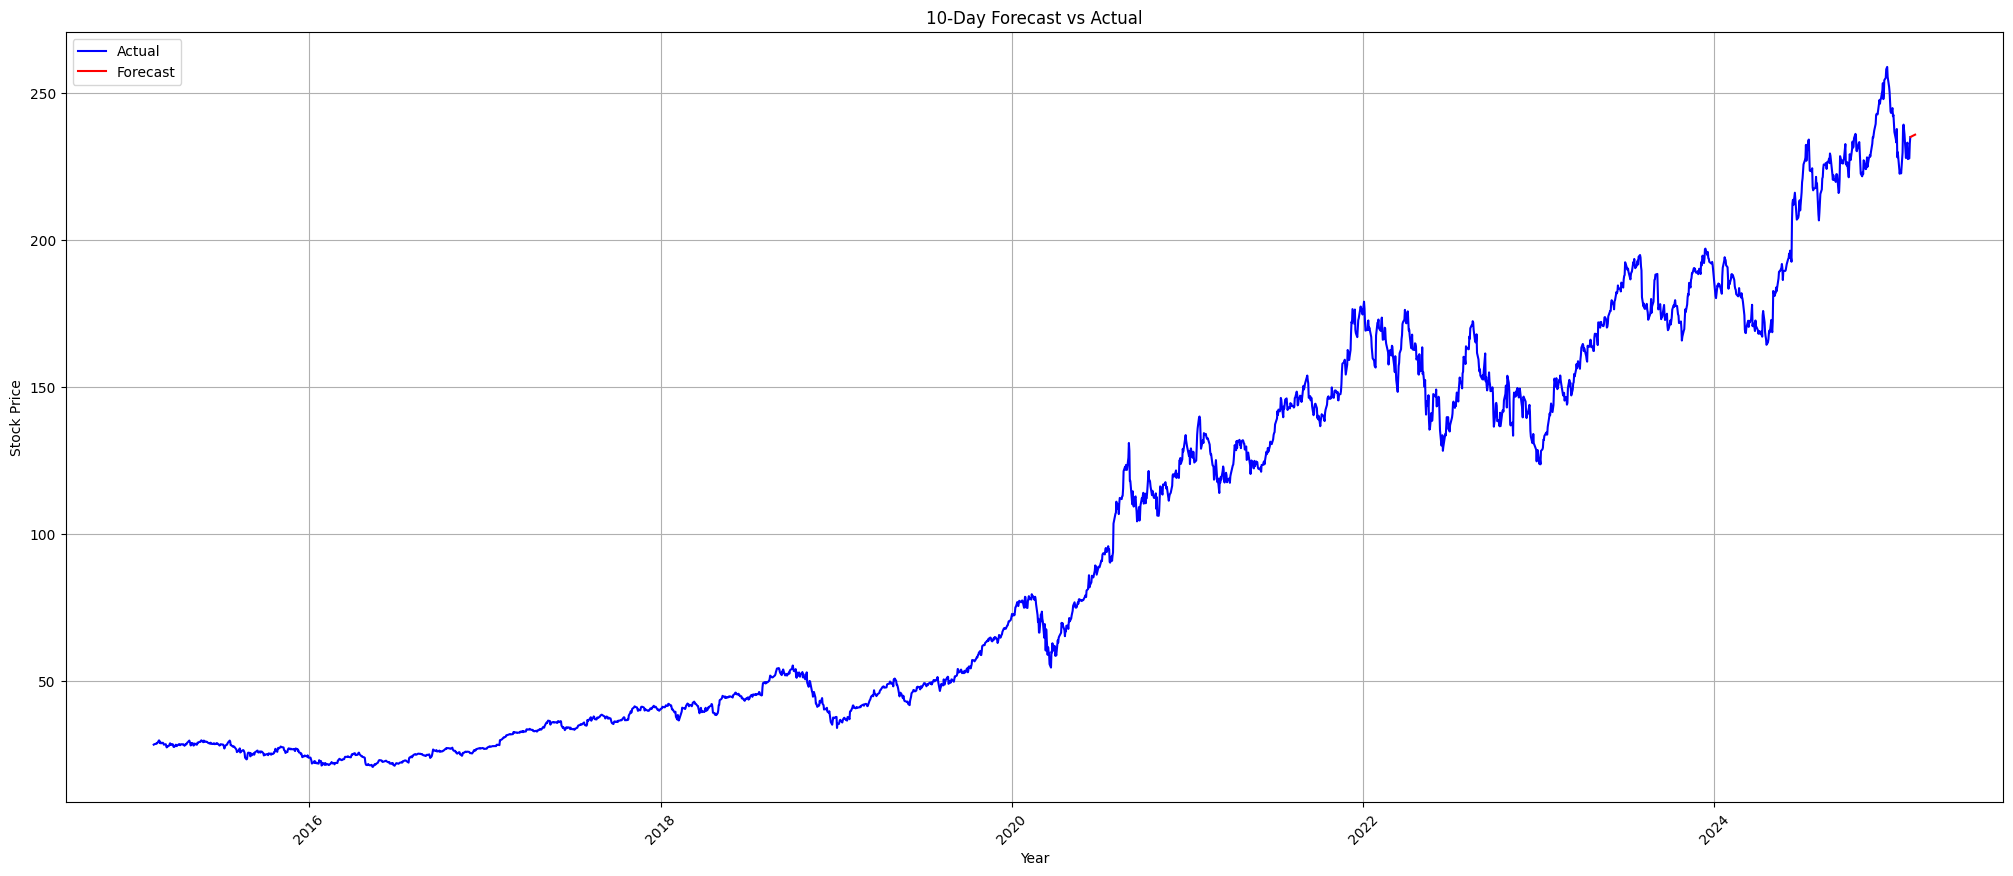

In [ ]:
# Plotting the actual values and forecasted values
plt.figure(figsize=(25, 10))
plt.plot(ts_data['Close_AAPL'], label='Actual', color='blue')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('10-Day Forecast vs Actual')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Assuming the actual values are the last 10 days of the 'Close' column
actual_values = ts_data['Close_AAPL'][-forecast_steps:].to_numpy()

# Since forecast_values is already a NumPy array, just flatten it
forecast_values = forecast_values.ravel()

# Check that both actual_values and forecast_values are 1D and have the same length
print(f"Actual values shape: {actual_values.shape}")
print(f"Forecast values shape: {forecast_values.shape}")

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Actual values shape: (10,)
Forecast values shape: (10,)
Mean Absolute Error (MAE): 3.8313137978160627
Mean Squared Error (MSE): 21.918322722454228
Root Mean Squared Error (RMSE): 4.681700836496735
Mean Absolute Percentage Error (MAPE): 1.6665058551448186%


<ipython-input-38-acf0d03f5da2>:5: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



**SARIMAX Model**

In [ ]:
# Define the split index (e.g., 80% for training and 20% for testing)
train_size = int(len(ts_data) * 0.8)  # 80% for training
train, test = ts_data['Close_AAPL'][:train_size], ts_data['Close_AAPL'][train_size:]

# Checking the sizes of train and test datasets
print(f'Train dataset size: {len(train)}')
print(f'Test dataset size: {len(test)}')

Train dataset size: 2012
Test dataset size: 504


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMAX model on the train dataset
model_sarimax = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 5))  # Example params
model_sarimax_fit = model_sarimax.fit(disp=False)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
# Forecast the next 10 periods (forecasting for the test set period)
forecast_steps = len(test)
forecast_values = model_sarimax_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



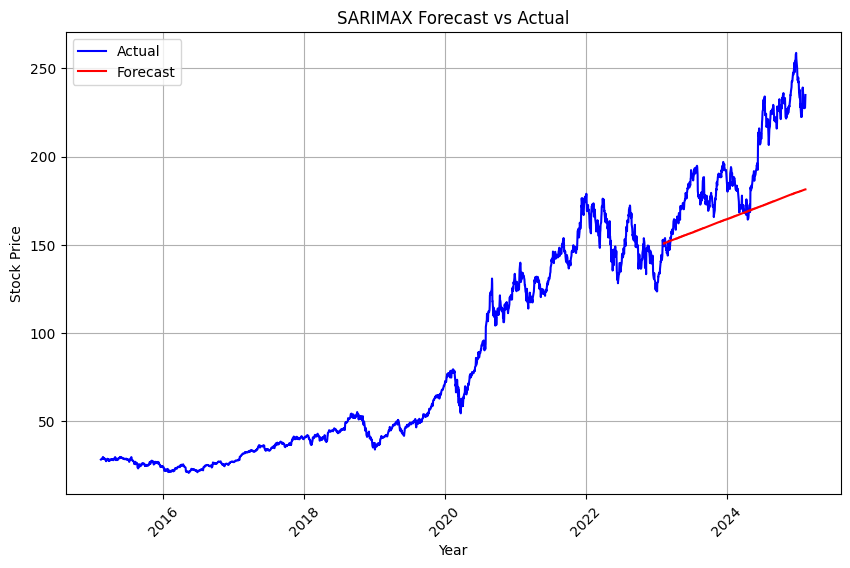

In [ ]:
# Plot the actual vs forecasted values
forecast_dates = test.index
plt.figure(figsize=(10, 6))
plt.plot(ts_data['Close_AAPL'], label='Actual', color='blue')
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')
plt.legend(loc='upper left')
plt.title('SARIMAX Forecast vs Actual')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# Ensure actual_values and forecast_values are 1-dimensional
actual_values = test.values.flatten()  # Flatten the test set values
forecast_values = forecast_values.to_numpy().flatten()  # Convert Series to NumPy array and flatten

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((actual_values - forecast_values) / actual_values)) * 100

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 28.225928776448463
Mean Squared Error (MSE): 1175.4661184233369
Root Mean Squared Error (RMSE): 34.28507136383614
Mean Absolute Percentage Error (MAPE): 13.500820229657448%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



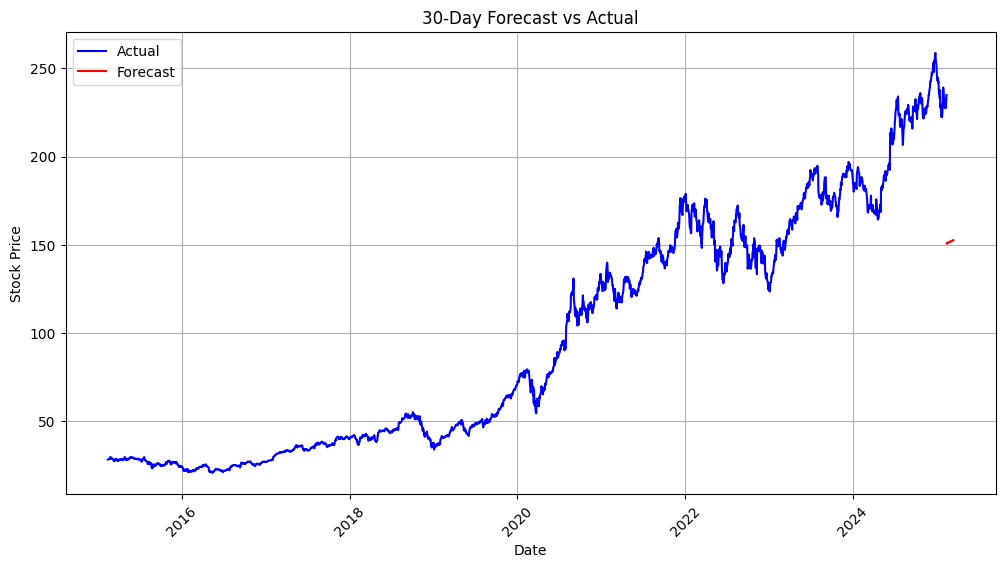

In [ ]:
# Set the number of steps to forecast (e.g., 30 days)
forecast_steps = 30

# Forecast the next 30 days
forecast_values = model_sarimax_fit.forecast(steps=forecast_steps)

# Create a future date range for plotting (you can adjust the frequency to 'D' for daily forecast)
forecast_dates = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Plotting the actual values and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data['Close_AAPL'], label='Actual', color='blue')  # Actual data
plt.plot(forecast_dates, forecast_values, label='Forecast', color='red')  # Forecasted data
plt.legend(loc='upper left')
plt.title(f'30-Day Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.grid()
plt.show()

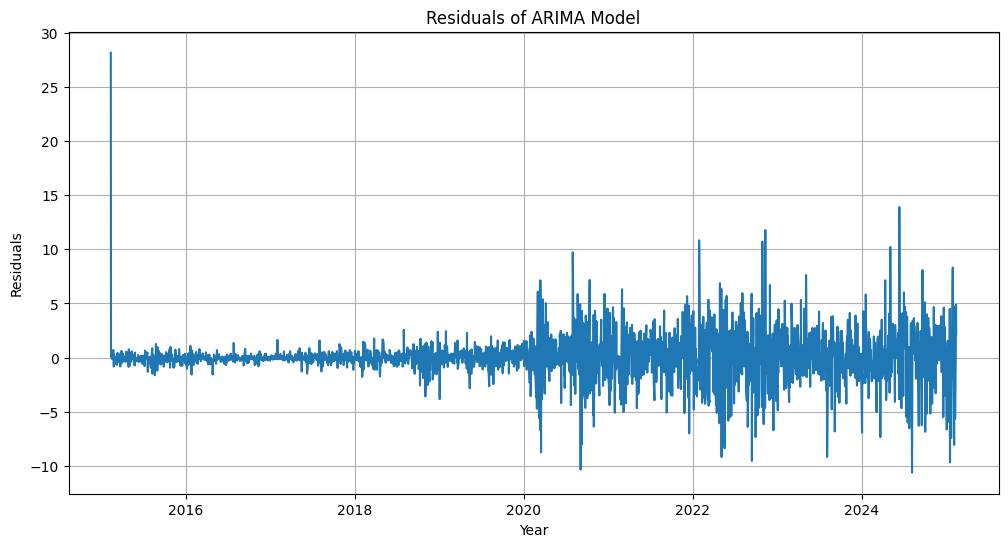

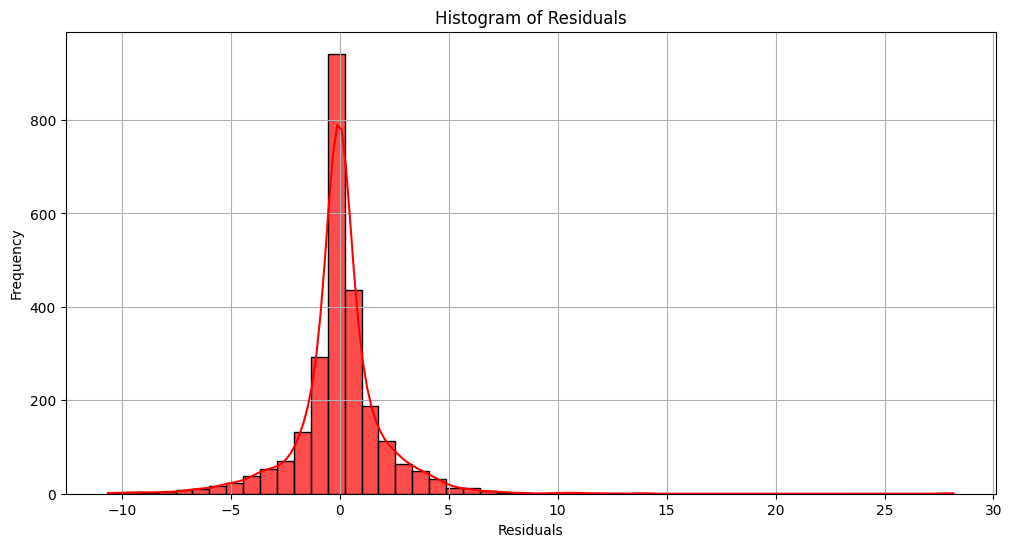

Ljung-Box Test for Autocorrelation in Residuals:
     lb_stat  lb_pvalue
10  18.97703   0.040555


In [ ]:
# Residual Analysis
# Get the residuals from the ARIMA model
residuals = arima_model.resid()

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# Plot histogram of residuals to check for normality
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=50, color='red',kde=True, alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Perform the Ljung-Box test for autocorrelation in residuals
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Print the results of the Ljung-Box test
print("Ljung-Box Test for Autocorrelation in Residuals:")
print(ljung_box_results)

# If p-value is > 0.05, it suggests no significant autocorrelation in residuals


**LSTM Model**

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

In [ ]:
# Extracting the 'Close_AAPL' column
close_price = data[['Close_AAPL']]
close_price.head()

,Close_AAPL
Date,
2015-02-12,28.242012
2015-02-13,28.380482
2015-02-17,28.547981
2015-02-18,28.746737
2015-02-19,28.686440


In [ ]:
# Scaling the data (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(close_price)

In [ ]:
# Preparing the data for the LSTM model
n_steps = 100
x_data = []
y_data = []

for i in range(n_steps, len(scaled_data)):
    x_data.append(scaled_data[i - n_steps:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(x_data) * 0.8) # 80% training data
x_train, x_test = x_data[:train_size], x_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

In [ ]:
lstm_model = Sequential()

In [ ]:
lstm_model.add(LSTM(64, return_sequences=True, input_shape=(n_steps, 1), kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.4))
lstm_model.add(LSTM(32, return_sequences=False, kernel_regularizer=l2(0.001)))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
lstm_model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
# Compile the model with the Adam optimizer
from keras.optimizers import Adam
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
# Train the Model with Callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [ ]:
# Train the model
history = lstm_model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 150ms/step - loss: 0.1383 - val_loss: 0.0796 - learning_rate: 0.0010
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - loss: 0.0737 - val_loss: 0.0587 - learning_rate: 0.0010
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step - loss: 0.0522 - val_loss: 0.0501 - learning_rate: 0.0010
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - loss: 0.0381 - val_loss: 0.0334 - learning_rate: 0.0010
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.0288 - val_loss: 0.0299 - learning_rate: 0.0010
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.0225 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0180 - val_loss: 0.0268 - learning_rate: 0.0010
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 8s 234ms/step - loss: 0.0147 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.0123 - val_loss: 0.0230 - learning_rate: 0.0010
Epoch 10/

In [ ]:
from keras.regularizers import l2

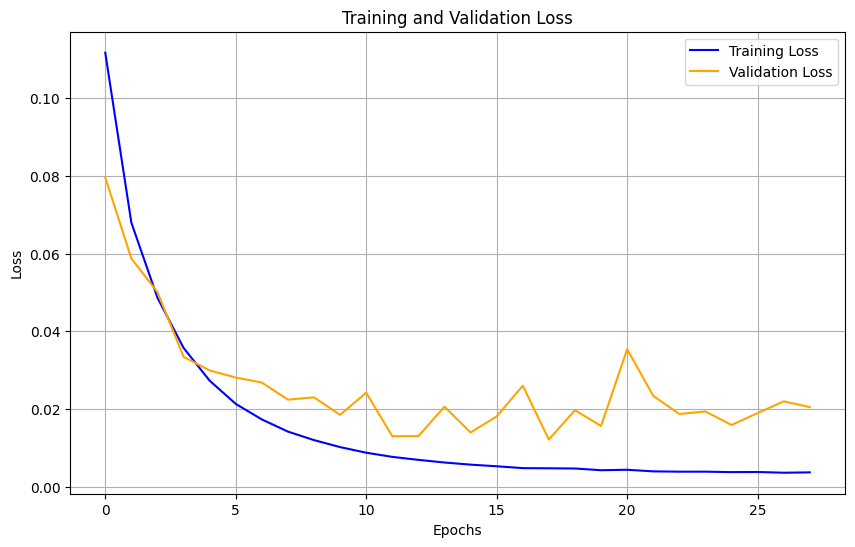

In [ ]:
# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Generate predictions
train_predictions = lstm_model.predict(x_train)
test_predictions = lstm_model.predict(x_test)

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Train RMSE: 0.0249
Test RMSE: 0.0953


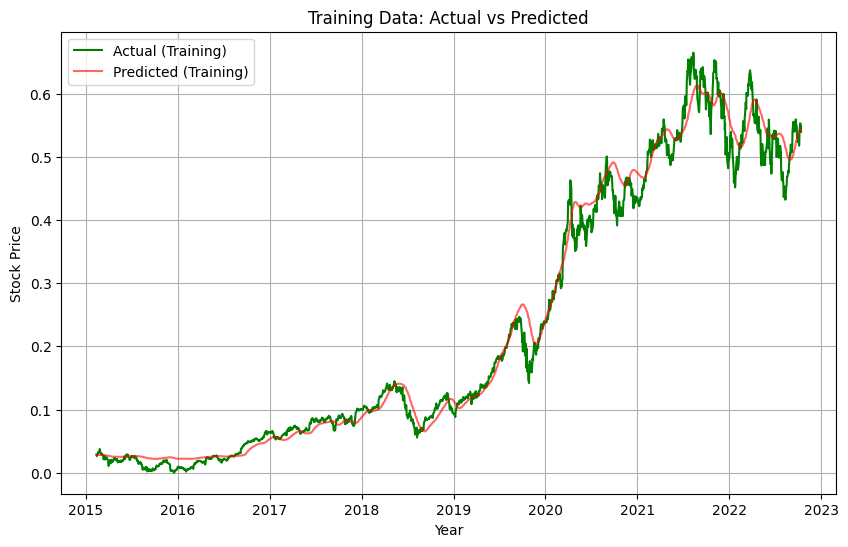

In [ ]:
# Assuming 'y_train' and 'train_predictions' correspond to the training data
# 'data' has the 'Date' column as the index
plt.figure(figsize=(10, 6))
plt.plot(data.index[:len(y_train)], y_train, label='Actual (Training)', color='green')
plt.plot(data.index[:len(train_predictions)], train_predictions, label='Predicted (Training)', color='red', alpha=0.6)
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

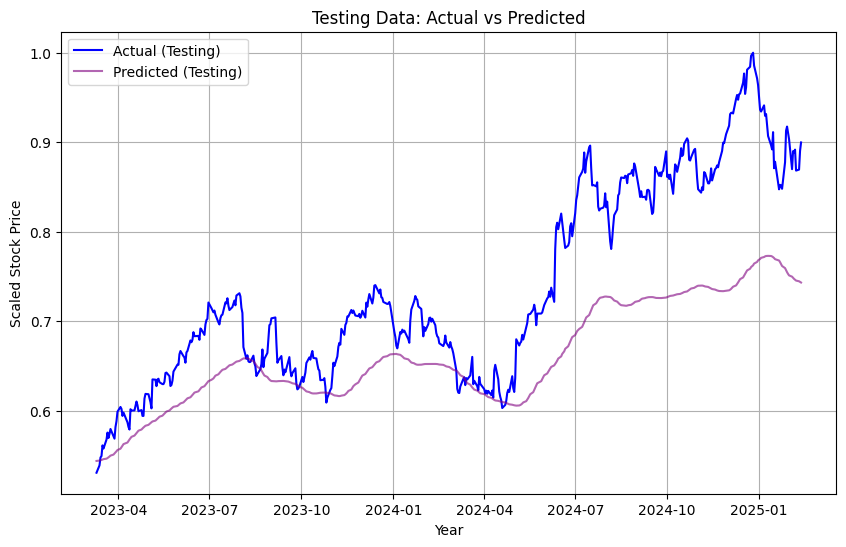

In [ ]:
# Plot Actual vs Predicted for Testing Data with Date on x-axis
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual (Testing)', color='blue')
plt.plot(data.index[-len(test_predictions):], test_predictions, label='Predicted (Testing)', color='purple', alpha=0.6)
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Prepare input data for future prediction (use the last portion of the test data)
last_sequence = x_test[-1]  # Get the last input sequence from test data
future_predictions = []  # To store the predicted stock prices

# Number of future days to predict
n_future_days = 30

# Generate future predictions
for _ in range(n_future_days):
    # Predict the next value
    next_pred = lstm_model.predict(last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1]))

    # Append the prediction to the list
    future_predictions.append(next_pred[0, 0])

    # Update the sequence for the next prediction
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

# Inverse scale the predictions (if you applied MinMaxScaler earlier)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

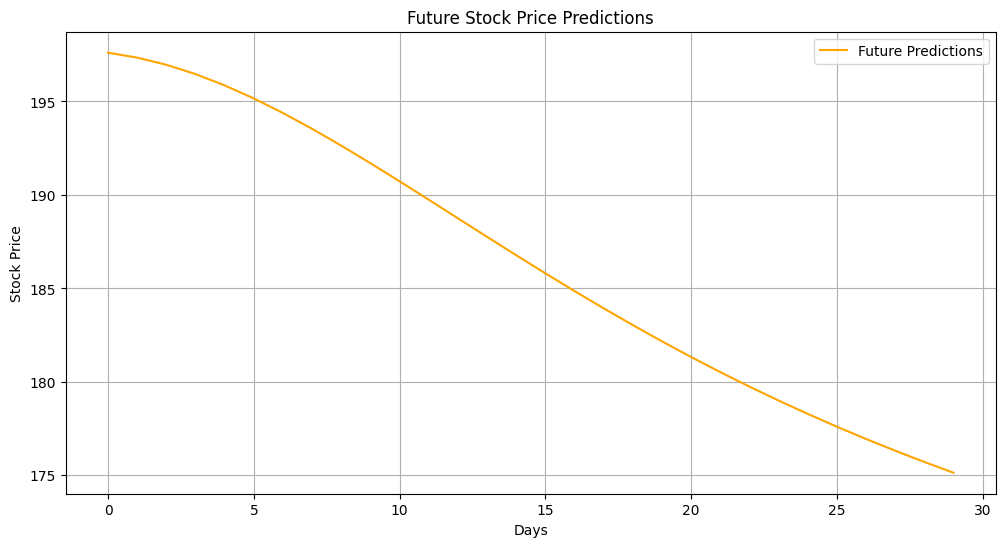

In [ ]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(future_predictions, label='Future Predictions', color='orange')
plt.title('Future Stock Price Predictions')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

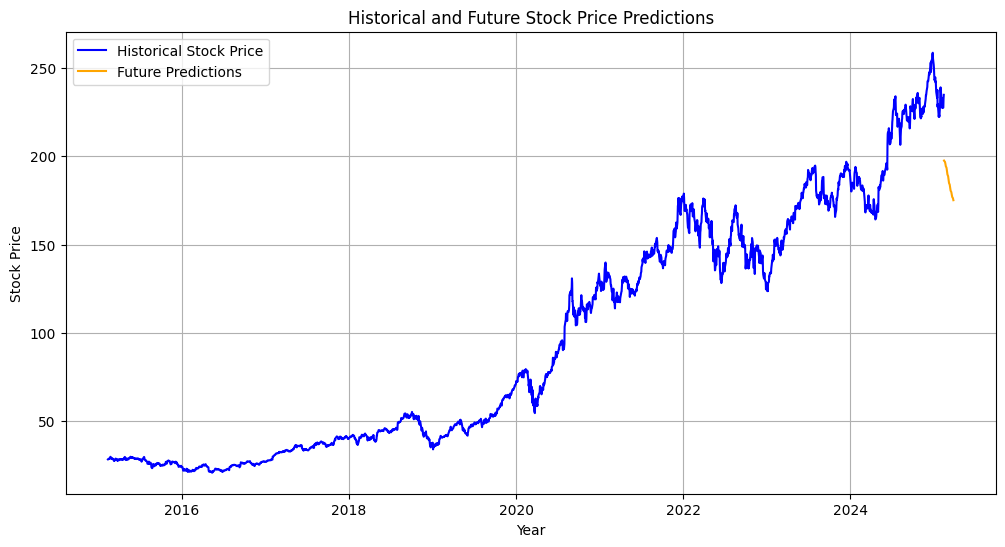

In [ ]:
import matplotlib.dates as mdates

# Flatten future_predictions to 1D if it is 2D
future_predictions = future_predictions.flatten()

# Combine historical data and future predictions
future_dates = pd.date_range(start=data.index[-1], periods=len(future_predictions) + 1, freq='B')[1:]

# Create full_dates by combining historical and future dates
full_dates = data.index.append(future_dates)

# Extend the stock prices with NaN for actual data and future predictions
full_stock_prices = pd.Series(data=np.append(data['Close_AAPL'].values, [np.nan] * len(future_predictions)), index=full_dates)
future_series = pd.Series(data=future_predictions, index=future_dates)

# Plot historical and future data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close_AAPL'], label='Historical Stock Price', color='blue')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='orange', linestyle='-')
plt.title('Historical and Future Stock Price Predictions')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


**Facebook Prophet Model**

In [ ]:
data.columns

Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
       '20 Day MA', '50 Day MA'],
      dtype='object')

In [ ]:
# Install Prophet
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,20 Day MA,50 Day MA
Date,,,,,,,
2015-02-12,28.242012,28.469807,28.043251,28.152681,297898000,NaN,NaN
2015-02-13,28.380482,28.425147,28.061123,28.425147,217088800,NaN,NaN
2015-02-17,28.547981,28.782476,28.344752,28.472049,252609600,NaN,NaN
2015-02-18,28.746737,28.760136,28.463109,28.503308,179566800,NaN,NaN
2015-02-19,28.686440,28.815970,28.659641,28.693139,149449600,NaN,NaN


In [ ]:
data.index

DatetimeIndex(['2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18',
               '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24',
               '2015-02-25', '2015-02-26',
               ...
               '2025-01-30', '2025-01-31', '2025-02-03', '2025-02-04',
               '2025-02-05', '2025-02-06', '2025-02-07', '2025-02-10',
               '2025-02-11', '2025-02-12'],
              dtype='datetime64[ns]', name='Date', length=2516, freq=None)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-02-12 to 2025-02-12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close_AAPL   2516 non-null   float64
 1   High_AAPL    2516 non-null   float64
 2   Low_AAPL     2516 non-null   float64
 3   Open_AAPL    2516 non-null   float64
 4   Volume_AAPL  2516 non-null   int64  
 5   20 Day MA    2497 non-null   float64
 6   50 Day MA    2467 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [ ]:
data = data[['Close_AAPL']].reset_index()
data.rename(columns={'Date': 'ds', 'Close_AAPL': 'y'}, inplace=True)  # Prophet requires 'ds' and 'y'

In [ ]:
# Convert 'ds' to datetime format
data['ds'] = pd.to_datetime(data['ds'])

In [ ]:
# Define the train-test split
fb_split_ratio = 0.8
fb_split_index = int(len(data) * fb_split_ratio)

fb_train = data.iloc[:fb_split_index]
fb_test = data.iloc[fb_split_index:]

In [ ]:
# Initialize and fit the Prophet model
fb_model = Prophet()
fb_model.fit(fb_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_jkdcer0/0st086xf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_jkdcer0/1xaabd5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46251', 'data', 'file=/tmp/tmp_jkdcer0/0st086xf.json', 'init=/tmp/tmp_jkdcer0/1xaabd5g.json', 'output', 'file=/tmp/tmp_jkdcer0/prophet_modelg7fpgh96/prophet_model-20250212163725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a future dataframe using fb_test dates
fb_future = fb_test[['ds']]
fb_forecast = fb_model.predict(fb_future)

In [ ]:
# Merge actual and predicted values for evaluation
fb_test_with_forecast = fb_test.copy()
fb_test_with_forecast['yhat'] = fb_forecast['yhat'].values

In [ ]:
# Evaluation metrics
mae = mean_absolute_error(fb_test_with_forecast['y'], fb_test_with_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(fb_test_with_forecast['y'], fb_test_with_forecast['yhat']))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 43.99374210010749
Root Mean Squared Error (RMSE): 51.113880030850005


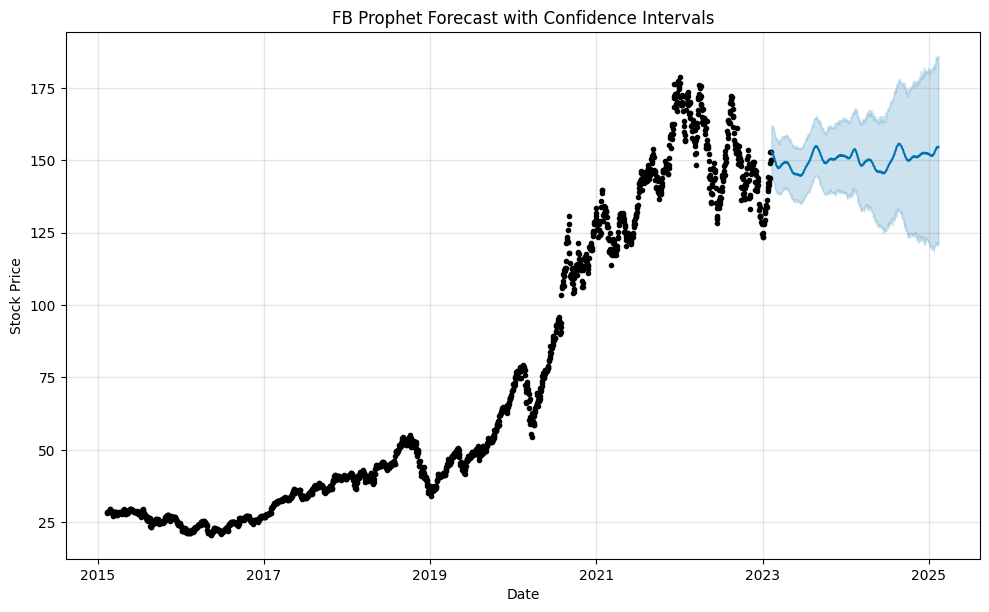

In [ ]:
# Plot the forecast
fb_model.plot(fb_forecast)
plt.title("FB Prophet Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

In [ ]:
# Forecasting future stock prices for 30 days ahead from today
today = datetime.today().date()

# Generate 30 future days
future_from_today = fb_model.make_future_dataframe(periods=30, include_history=False)

# Predict future stock prices
future_forecast_from_today = fb_model.predict(future_from_today)

# Display future predictions
print(future_forecast_from_today[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30))

           ds        yhat  yhat_lower  yhat_upper
0  2023-02-09  152.858623  144.269903  161.758316
1  2023-02-10  152.744527  143.533767  161.562676
2  2023-02-11  151.606557  142.500132  160.444707
3  2023-02-12  151.538710  142.449419  160.387191
4  2023-02-13  152.841499  144.035078  161.522619
5  2023-02-14  152.638979  143.120237  161.649535
6  2023-02-15  152.491857  143.560054  161.609712
7  2023-02-16  152.178449  143.030483  161.366508
8  2023-02-17  151.861342  143.211372  160.863493
9  2023-02-18  150.528346  141.670040  160.472725
10 2023-02-19  150.276677  140.454706  159.239699
11 2023-02-20  151.409863  142.255869  160.649361
12 2023-02-21  151.054708  142.055239  160.066067
13 2023-02-22  150.774341  141.256171  159.729031
14 2023-02-23  150.349133  141.032062  160.129792
15 2023-02-24  149.943308  140.828134  158.853362
16 2023-02-25  148.545870  139.441813  157.898304
17 2023-02-26  148.254763  139.091250  157.534852
18 2023-02-27  149.373772  139.717693  157.919209


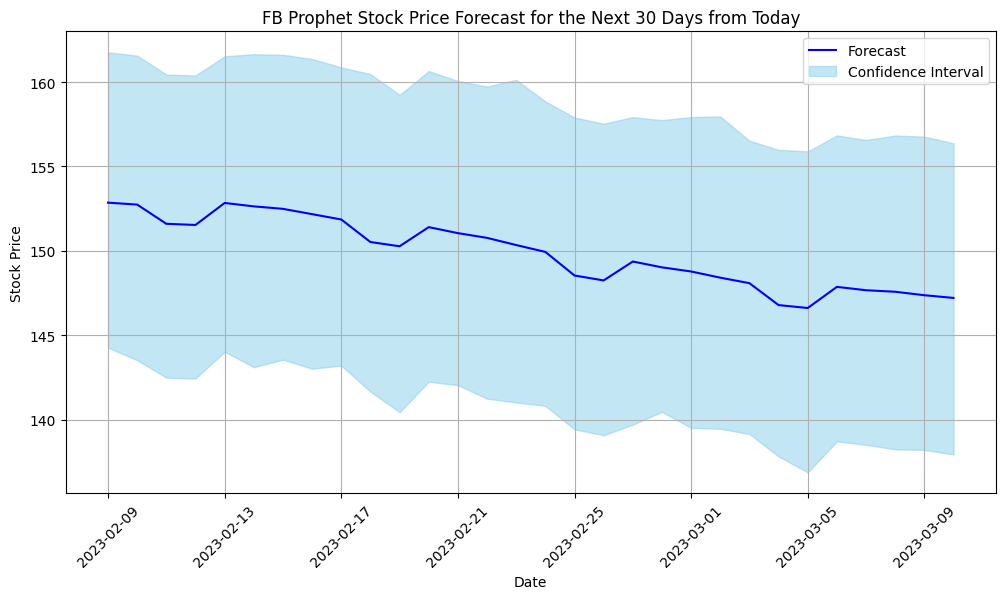

In [ ]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_forecast_from_today['ds'], future_forecast_from_today['yhat'], label='Forecast', color='blue')
plt.fill_between(
    future_forecast_from_today['ds'],
    future_forecast_from_today['yhat_lower'],
    future_forecast_from_today['yhat_upper'],
    color='skyblue',
    alpha=0.5,
    label='Confidence Interval'
)
plt.title("FB Prophet Stock Price Forecast for the Next 30 Days from Today")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Create a future dataframe for the next 30 days starting from today
today_date = '2025-02-09'
future_30_days = pd.date_range(start=today_date, periods=30, freq='D')
future_from_today = pd.DataFrame({'ds': future_30_days})

In [ ]:
future_forecast_from_today = fb_model.predict(future_from_today)

In [ ]:
# Displaying the last 30 days of forecast for validation
print(future_forecast_from_today[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

           ds        yhat  yhat_lower  yhat_upper
0  2025-02-09  153.334214  143.853358  162.362333
1  2025-02-10  154.713844  144.820226  163.698956
2  2025-02-11  154.587420  145.271202  163.202154
3  2025-02-12  154.514383  145.762066  163.634202
4  2025-02-13  154.271814  145.405629  163.461048
5  2025-02-14  154.021124  144.894379  163.311963
6  2025-02-15  152.749025  143.095084  161.237459
7  2025-02-16  152.551744  144.691823  161.344465
8  2025-02-17  153.731943  144.431513  162.488669
9  2025-02-18  153.415704  144.517332  162.099286
10 2025-02-19  153.165592  144.143734  162.868028
11 2025-02-20  152.761580  143.345806  161.882379
12 2025-02-21  152.367669  143.625272  161.157365
13 2025-02-22  150.972817  141.553025  159.651420
14 2025-02-23  150.675099  141.331925  159.890769
15 2025-02-24  151.778597  143.056276  160.487494
16 2025-02-25  151.410356  142.672813  160.262545
17 2025-02-26  151.133435  141.853128  160.149687
18 2025-02-27  150.727823  141.713752  160.191810


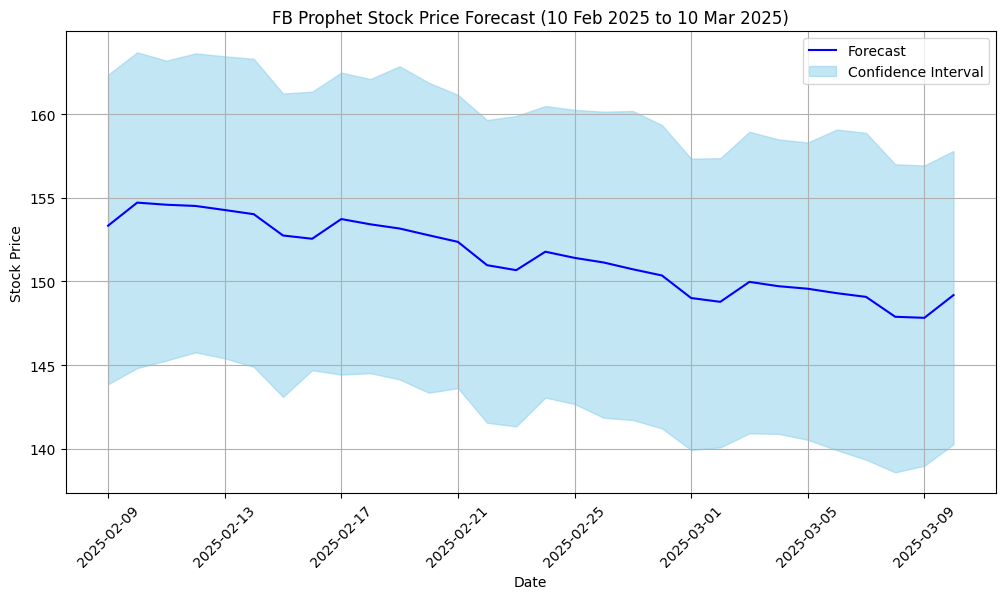

In [ ]:
# Plot the forecast for the next 30 days
plt.figure(figsize=(12, 6))
plt.plot(
    future_forecast_from_today['ds'],
    future_forecast_from_today['yhat'],
    label='Forecast',
    color='blue'
)
plt.fill_between(
    future_forecast_from_today['ds'],
    future_forecast_from_today['yhat_lower'],
    future_forecast_from_today['yhat_upper'],
    color='skyblue',
    alpha=0.5,
    label='Confidence Interval'
)
plt.title("FB Prophet Stock Price Forecast (10 Feb 2025 to 10 Mar 2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [ ]:
from joblib import dump

# Save the FB Prophet model to a file
dump(fb_model, 'fb_prophet_model.joblib')

['fb_prophet_model.joblib']

In [ ]:
# Save the LSTM Model to a file
dump(lstm_model, 'lstm_model.joblib')

['lstm_model.joblib']